# Welcome to Quantum Spy Training Part 2
<h2 style="font-size: 30px;"><span style="font-family: cursive;"><strong style="color: red;">Introduction</h2></span>


<p style="font-size: 18px;">Welcome to Part 2 of Quantum Spy Training! In the previous part, you were introduced to your mission, which involves retrieving classified information from a highly secure facility using quantum technology. Now, let's continue your training.

</p>

<div style="text-align: center;">
  <img src="https://drive.google.com/uc?id=1E0mM407rgNsbZJMEVQQNThXuMMFaLBpv" alt="" width="600"/>
</div>

In [1]:
!pip install qiskit
!pip install qiskit-aer
!pip install matplotlib
!pip install pylatexenc
!pip install numpy
!pip3 install tqdm

In [2]:

import numpy as np
import matplotlib.pyplot as plt

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, QuantumRegister, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
#from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from tqdm.notebook import tqdm

from qiskit.providers.aer import QasmSimulator
from qiskit.tools.monitor import job_monitor
from qiskit.circuit import Parameter
import qiskit.quantum_info as qi

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

import pylatexenc # Required to use 'MatplotlibDrawer'.
import IPython

from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_bloch_multivector

points=0

<h2 style="font-size: 30px;"><span style="font-family: cursive;"><strong style="color: red;">Chapter 5:</strong> Quantum Circuits </h2></span>

<h3 style="font-size: 22px;"><strong style="color: red;"> Exercise 1: Recreating Quantum Circuits</strong> </h3>



<p style="font-size: 18px;">
In this exercise, we will be recreating quantum circuits using the Qiskit library.</p>

<p style="font-size: 18px;"><strong>What is a quantum circuit?</strong></p>
<p style="font-size: 18px;">
A quantum circuit is a way of representing and manipulating quantum information. It consists of a series of quantum gates, which are operations that act on the quantum bits (qubits) in the circuit. These gates allow us to perform various operations such as creating superposition states, manipulating entanglement, and performing measurements.
<p style="font-size: 18px;">
Using Qiskit, we can create quantum circuits and run them on quantum computers or simulators. The library provides a simple and intuitive interface for constructing circuits, adding gates, and visualizing the results.</p>
<p style="font-size: 18px;">
In this exercise, we will start by creating a simple circuit with a single qubit. We will add gates to the circuit to create a superposition state. Then, we will measure the qubit and visualize the results.
<p style="font-size: 18px;">
Next, we will create a more complex circuit with multiple qubits. We will add entangling gates to create entanglement between the qubits and perform measurements on the individual and entangled qubits.
<p style="font-size: 18px;">
By the end of this exercise, you will have a good understanding of how to create quantum circuits using Qiskit and how to add gates to manipulate the qubits.</p>


    
<div style="text-align: center;">
  <img src="https://drive.google.com/uc?id=1fqS4tNwbrt5E8_nTdOR1PSsbSFWbNQ5r" alt="drawing" width="500"/>
</div>



<p style="font-size: 20px;" ><strong style="color: blue;">Task 5.1: Build the first circuit:</strong> Recreate this circuit: 3 Qubits and 3 Classical </p>




<div style="text-align: center;">
  <img src="https://drive.google.com/uc?id=1M-J88dbu0OzAh2JUtC9yvOTHMwZ406do" alt="drawing" width="800"/>
</div>



<p style="font-size: 18px;"><strong style="color: blue;">YOUR TURN: Task 5.1.1</strong>: Create a circuit named <strong>circuit1</strong> with 3 Qubits and 3 Classical Bits

In [3]:
#YOUR CODE
circuit1 = QuantumCircuit(3, 3)

In [4]:
#Test - Dont change anything here
assert isinstance(circuit1, QuantumCircuit), "circuit1 should be a QuantumCircuit"
assert circuit1.num_qubits == 3, "circuit1 should have 3 qubits"
assert circuit1.num_clbits == 3, "circuit1 should have 3 classical bits"


if all([
    isinstance(circuit1, QuantumCircuit),
    circuit1.num_qubits == 3,
    circuit1.num_clbits == 3
]):
    points += 2

    print("Yayy🥳🥳! You scored 2/2 points")




Yayy🥳🥳! You scored 2/2 points



<p style="font-size: 18px;"><strong style="color: blue;">YOUR TURN: Task 5.1.2</strong>: Apply the above gates to your qubits <strong></strong> 

In [5]:
#YOUR CODE
def f(circuit1):

    circuit1.h(1)
    circuit1.cx(1,2)
    circuit1.cx(0,1)
    circuit1.h(0)
    circuit1.barrier()
    circuit1.measure(0,0)
    circuit1.measure(1,1)
    circuit1.barrier()
    circuit1.cx(1,2)
    circuit1.cz(0,2)


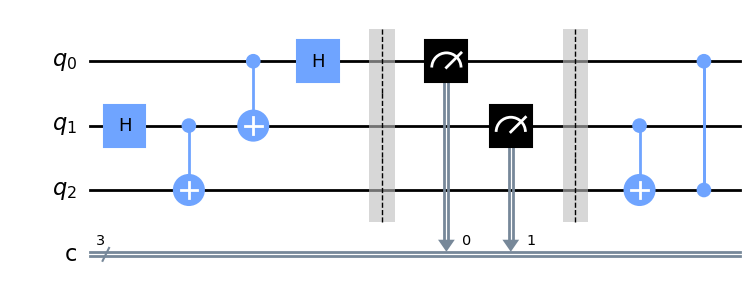

In [6]:
#Dont change anything here
f(circuit1)
circuit_drawer(circuit1, output="mpl")

In [7]:
#Test - Dont change anything here

from qiskit import Aer
import numpy as np
from qiskit.quantum_info.operators.symplectic import Pauli

op = Pauli('ZII')

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')


init_angles = [0., np.pi/6]
expected_results = [1., 0.866]

for init_angle, expected_result in zip(init_angles, expected_results):
    test_circ = QuantumCircuit(3,3)
    test_circ.ry(init_angle, 0) # init state that shall be teleported
    f(test_circ) # perform teleportation

    # measure the result
    job = backend.run(test_circ)
    result = job.result()
    outputstate = result.get_statevector(test_circ, decimals=4)
    expval = outputstate.expectation_value(op)

    assert np.isclose(expval, expected_result, rtol=1e-3), "the circuit is incorrect."

if np.isclose(expval, expected_result, rtol=1e-3):
    points+=3
    print("Yayy🥳🥳! You scored 3/3 points")



Yayy🥳🥳! You scored 3/3 points


<p style="font-size: 18px;">Congo! You successfully completed your first circuit! 🥳🥳🥳</p>


<p style="font-size: 20px;" ><strong style="color: blue;">Task 5.2: Build the second circuit:</strong> Recreate this circuit: 5 Qubits and 3 Classical </p>




<div style="text-align: center;">
  <img src="https://drive.google.com/uc?id=11uiRJWalqYYT9W_vrxz805F27gXflN18" alt="drawing" width="800"/>
</div>



<p style="font-size: 18px;"><strong style="color: blue;">YOUR TURN: Task 5.2.1</strong>: Create a circuit named <strong>circuit2</strong> with 5 Qubits and 3 Classical Bits

In [8]:
# Create a quantum circuit with 5 qubits and 3 classical bits
circuit2 = QuantumCircuit(5, 3)


In [9]:
assert isinstance(circuit1, QuantumCircuit), "circuit2 should be a QuantumCircuit"
assert circuit2.num_qubits == 5, "circuit1 should have 3 qubits"
assert circuit2.num_clbits == 3, "circuit1 should have 3 classical bits"

if all([
    isinstance(circuit2, QuantumCircuit),
    circuit2.num_qubits == 5,
    circuit2.num_clbits == 3
]):
    points += 2
    print("Yayy🥳🥳! You scored 2/2 points")
    

Yayy🥳🥳! You scored 2/2 points


<p style="font-size: 18px;"><strong style="color: blue;">YOUR TURN: Task 5.2.2</strong>: Apply the gates in the above circuits to your qubits <strong></strong> 

In [10]:
# Apply gates to the circuit
def f2(circuit2):
    circuit2.h(0)
    circuit2.h(1)
    circuit2.cx(0, 2)
    circuit2.cx(1, 2)
    circuit2.tdg(0)
    circuit2.t(1)
    circuit2.barrier()
    circuit2.cx(2, 3)
    circuit2.ccx(2, 3, 4)
    circuit2.h(2)
    circuit2.cswap(0, 1, 2)
    circuit2.barrier()
    


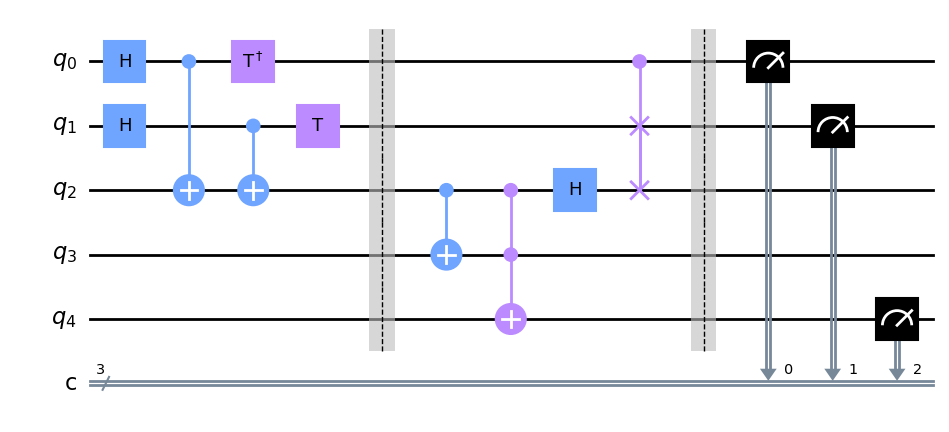

In [11]:
# Don't change anything here

f2(circuit2)
circuit2.measure(0, 0)
circuit2.measure(1, 1)
circuit2.measure(4, 2)

circuit_drawer(circuit2, output="mpl")

In [12]:
#Test - Dont change anything here
outputstates = []

def prep_test1(circ):
    pass

def prep_test2(circ):
    # some random initialization of the circuit
    circ.h(0)
    circ.h(1)
    circ.h(2)
    circ.cx(2,3)
    circ.cx(3,0)

preps = [prep_test1, prep_test2]
states = [
    [ 0.3536+0.j  ,  0.    +0.j  ,  0.    +0.j  ,  0.    +0.j  ,
      0.3536+0.j  ,  0.3536+0.j  ,  0.    +0.j  ,  0.3536+0.j  ,
      0.    +0.j  ,  0.    +0.j  ,  0.    +0.j  ,  0.    +0.j  ,
      0.    +0.j  ,  0.    +0.j  ,  0.    +0.j  ,  0.    +0.j  ,
      0.    +0.j  ,  0.    +0.j  ,  0.    +0.j  ,  0.    +0.j  ,
      0.    +0.j  ,  0.    +0.j  ,  0.    +0.j  ,  0.    +0.j  ,
      0.    +0.j  ,  0.25  -0.25j,  0.25  +0.25j, -0.25  +0.25j,
      0.    +0.j  ,  0.    +0.j  , -0.25  -0.25j,  0.    +0.j  ],
    [ 1.-0.j,  0.+0.j,  0.+0.j,  0.+0.j, -0.+0.j, -0.-0.j,  0.+0.j,
      0.+0.j,  0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,  0.+0.j,  0.+0.j,
      -0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
      0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -0.-0.j, -0.-0.j,
      0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j]
]

for prep, state in zip(preps, states):
    circuit2 = QuantumCircuit(5, 3)

    # Apply gates to the circuit
    prep(circuit2)
    f2(circuit2)

    backend = Aer.get_backend('statevector_simulator')
    job = backend.run(circuit2)
    result = job.result()
    outputstate = result.get_statevector(circuit2, decimals=4)
    
    assert np.allclose(outputstate, state), "circuit is wrong"


points+=3
print("Yayy🥳🥳! You scored 3/3 points")
    


Yayy🥳🥳! You scored 3/3 points



<h3 style="font-size: 22px;"><strong style="color: red;"> Exercise 2: Measuring Circuit Depth</strong> </h3>

<p style="font-size: 18px;">
In this exercise, we will explore the concept of circuit depth in quantum circuits.</p>


<p style="font-size: 18px;">
The circuit depth refers to the number of layers or levels in a quantum circuit. Each layer consists of a set of gates that act on the qubits simultaneously. The depth of the circuit determines the number of computational steps required to execute the circuit. Gates that operate on independed sets of qubits are generally executed in parallel to shorten execution time, and prevent decoherence. </p>

<p style="font-size: 18px;"><strong>Why is cirucit depth important?</strong></p>
<p style="font-size: 18px;">
By increasing the circuit depth, we can perform more complex operations and achieve more powerful computations. However, deeper circuits take longer to execute, hence making external perturbations more likely to occur mid-calculation. Quantum gates are also not perfect, and commulative errors in deep circuits can lead to noisy results.</p>


<div style="text-align: center;">
  <img src="https://drive.google.com/uc?id=17Ojxhi-TBOiKSWCuLrXnBeElIJmz-D_7" alt="drawing" width="500"/>
</div>


<p style="font-size: 17px;"><strong style="color: blue;">OUR TURN:</strong><strong> Walkthrough Example of Circuit Depth</strong> </p> 

<p style="font-size: 15px;"><strong style="color: blue;">1. We create a small circuit with 2 qubits and apply 2 gates to it</strong> </p> 


In [13]:
from qiskit import QuantumCircuit

# Create a quantum circuit with 2 qubits and 1 classical bit
circuit = QuantumCircuit(2, 1)

# Add gates to manipulate the qubits
circuit.h(0)
circuit.cx(0, 1)

# Measure the qubits and store the result in a classical bit
circuit.measure(1, 0)

# Visualize the circuit
circuit.draw()


┌───┐        
q_0: ┤ H ├──■─────
     └───┘┌─┴─┐┌─┐
q_1: ─────┤ X ├┤M├
          └───┘└╥┘
c: 1/═══════════╩═
                0


<p style="font-size: 15px;"><strong style="color: blue;">2. We measure circuit depth </p> 
    
<p style="font-size: 17px;">
In this example, we have a simple quantum circuit with only 2 qubits and a <strong> depth of 3</strong>. <br>We apply a Hadamard gate h to the first qubit, and then a controlled-X gate cx to entangle the qubits. Finally, we measure the second qubit and store the result in a classical bit. </p> 

In [14]:
circuit.depth()

3



<p style="font-size: 15px;"><strong style="color: blue;">3. Circuit with Increased Depth and Measurement </p> 

<p style="font-size: 17px;">
Now we will increase the circuit  by 1 qubit and add more operations. </p> 

In [15]:
from qiskit import QuantumCircuit

# Create a quantum circuit with 3 qubits and 1 classical bit
circuit = QuantumCircuit(3, 1)

# Add gates to manipulate the qubits
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1, 2)
circuit.barrier()
circuit.h(2)
circuit.cx(0, 1)
circuit.cx(1, 2)
circuit.barrier()
circuit.h(2)
circuit.cx(0, 1)
circuit.cx(1, 2)

# Measure the qubits and store the result in a classical bit
circuit.measure(2, 0)

# Visualize the circuit
circuit.draw()


┌───┐           ░            ░              
q_0: ┤ H ├──■────────░───■────────░───■──────────
     └───┘┌─┴─┐      ░ ┌─┴─┐      ░ ┌─┴─┐        
q_1: ─────┤ X ├──■───░─┤ X ├──■───░─┤ X ├──■─────
          └───┘┌─┴─┐ ░ ├───┤┌─┴─┐ ░ ├───┤┌─┴─┐┌─┐
q_2: ──────────┤ X ├─░─┤ H ├┤ X ├─░─┤ H ├┤ X ├┤M├
               └───┘ ░ └───┘└───┘ ░ └───┘└───┘└╥┘
c: 1/══════════════════════════════════════════╩═
                                               0

<p style="font-size: 15px;"><strong style="color: blue;">4. Measure the increased circuit depth </p> 

<p style="font-size: 17px;">
In this example, we have increased the depth of the circuit to 8. The first two layers represent the gates applied to manipulate the qubits, similar to the earlier example. The third| and fourth layers consist of barriers to visually separate the gates. The fifth and sixth layers repeat the set of gates, and the seventh layer consists of a barrier. The eighth layer includes the measurement operation.
<p style="font-size: 17px;">
In both examples, the measurement step adds an additional layer, increasing the circuit depth. It's important to consider the measurement operation while analyzing and understanding the depth of a circuit.

 </p> 

In [16]:
circuit.depth()

8


<p style="font-size: 20px;" ><strong style="color: blue;">Task 5.3: Measure the circuit depth of</strong> Write the answer in variable circuit1_depth</p>


<p style="font-size: 17px;"><strong style="color: blue;">YOUR TURN: Task 5.3.1</strong>:  Measure the circuit depth of circuit1 in Task 5.1 and store the result in variable<strong> circuit1_depth</strong></strong> 


In [17]:
circuit1_depth = 7 ### YOUR ANSWER  HERE|

In [18]:
#Test - Dont change anything here
assert circuit1_depth == circuit1.depth()

if circuit1_depth == circuit1.depth():
    points+=1
    print("Yayy🥳🥳! You scored 1/1 points")


Yayy🥳🥳! You scored 1/1 points


<p style="font-size: 17px;"><strong style="color: blue;">YOUR TURN: Task 5.3.2</strong>:  Measure the circuit depth of circuit2 in Task 5.2 and store the result in variable<strong> circuit2_depth</strong></strong> 

In [19]:
circuit2_depth = 11 ### YOUR ANSWER  HERE

In [20]:
#Test - Dont change anything here
assert circuit2_depth == circuit2.depth()
if circuit2_depth == circuit2.depth():
    points+=1
    print("Yayy🥳🥳! You scored 1/1 points")

Yayy🥳🥳! You scored 1/1 points


<h2 style="font-size: 30px;"><span style="font-family: cursive;"><strong style="color: red;">Chapter 6:</strong> GHZ States (Greenberger-Horne-Zeilinger States)</h2></span>



<h3 style="font-size: 22px;"><strong style="color: red;"> Exercise 1: Exploring GHZ States</strong> </h3>

## GHZ States (Greenberger-Horne-Zeilinger States)

<p style="font-size: 17px;">
GHZ states, short for Greenberger-Horne-Zeilinger states, are a class of quantum entangled states that exhibit intricate correlations among multiple quantum particles. They are named after the physicists Daniel Greenberger, Michael Horne, and Anton Zeilinger, who introduced the concept.</p>
<p style="font-size: 17px;">
GHZ states represent a unique form of multipartite <strong>entanglement</strong> , often involving a set of qubits (quantum bits). The canonical GHZ state for \(n\) qubits is defined as:</p>

$$|\text{GHZ}\rangle = \frac{1}{\sqrt{2}} (|0\ldots0\rangle + |1\ldots1\rangle)$$



<div style="text-align: center;">
  <img src="https://drive.google.com/uc?id=10WD0s9bLVbSRH2U_iutx-uT_4V-8WTUY" alt="drawing" width="500"/>
</div>


<p style="font-size: 17px;">
In this state, all qubits are in a superposition of both the 0 and 1 states, resulting in an intriguing quantum correlation where all qubits are simultaneously in a state of |0⟩ or |1⟩.</p>

<p style="font-size: 17px;">
Key Features and Significance: </p>

<p style="font-size: 17px;">
1. <strong>Quantum Entanglement:</strong> GHZ states exemplify the concept of quantum entanglement, where the properties of the individual qubits become correlated in such a way that measuring one qubit instantaneously determines the state of the others, regardless of the spatial separation.</p>

<p style="font-size: 17px;">
2. <strong>Bell Test Experiments:</strong> GHZ states have played a pivotal role in the development of quantum mechanics and the testing of Bell's inequalities, providing strong evidence against classical hidden-variable theories and supporting the concept of quantum non-locality.</p>
    
<p style="font-size: 17px;">
3. <strong>Quantum Information Processing:</strong> GHZ states are essential in quantum computing and quantum information processing, as they form the basis for various quantum algorithms and quantum error correction codes.</p>
<p style="font-size: 17px;">
4. <strong>Foundational to Quantum Physics:</strong> The study of GHZ states is foundational to understanding the fundamental principles of quantum physics and the nature of quantum superposition and entanglement.</p>

<p style="font-size: 17px;">
GHZ states represent a fascinating aspect of quantum mechanics, demonstrating the counterintuitive and mysterious behavior of quantum systems. Their properties have profound implications for both fundamental physics and practical applications in quantum technology.
</p>


<div style="text-align: center;">
  <img src="https://drive.google.com/uc?id=1c_1_ettZfz-yjyAQOECs18kuOeAi-75b" alt="drawing" width="500"/>
</div>



<p style="font-size: 20px;" ><strong style="color: blue;">Task 6.1: Create GHZ-State for 2 qubits


<p style="font-size: 17px;"><strong style="color: blue;">YOUR TURN: Task 6.1.1</strong>: <strong>1. Create quantum circuit.</strong> For a 2-qubit GHZ state we need a circuit with 2 qubits. Create a circuit named <strong>ghz_circuit_2</strong> 
    with 2 qubits

In [21]:
### YOUR CODE  HERE 
ghz_circuit_2 = QuantumCircuit(2) 

In [22]:
#Test - Dont change anything here
assert isinstance(ghz_circuit_2, QuantumCircuit), "ghz_circuit_2 should be a QuantumCircuit"
if isinstance(ghz_circuit_2, QuantumCircuit):
    points += 1
    print("Yayy🥳🥳! You scored 1/1 points")

Yayy🥳🥳! You scored 1/1 points


<p style="font-size: 17px;"><strong style="color: blue;">YOUR TURN: Task 6.1.2</strong>:<strong> 2. Apply the gates</strong> For a 2-qubit GHZ state we need to apply Hadamard Gate on 1st Qubit in state |0>, and  C-Not Gate on 2nd Qubit, using the 1st Qubit as Control Bit.

In [23]:

### YOUR CODE STARTS HERE
def ghz_1(ghz_circuit_2):
    ghz_circuit_2.h(0)
    ghz_circuit_2.cx(0,1)

### YOUR CODE ENDS HERE


In [24]:
#Test - Dont change anything here
ghz_1(ghz_circuit_2)
backend = Aer.get_backend('statevector_simulator')
job = backend.run(ghz_circuit_2)
result = job.result()
outputstate = result.get_statevector(ghz_circuit_2, decimals=4)

assert np.allclose([1./np.sqrt(2.), 0., 0., 1./np.sqrt(2.)], outputstate.data)

if np.allclose([1./np.sqrt(2.), 0., 0., 1./np.sqrt(2.)], outputstate.data):
    points += 2
    print("Yayy🥳🥳! You scored 2/2 points")
    

Yayy🥳🥳! You scored 2/2 points


<p style="font-size: 17px;"><strong style="color: blue;">OUR TURN</strong>: <strong> 3. Now we draw the circuit</strong>

In [25]:
ghz_circuit_2.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

<p style="font-size: 17px;"><strong style="color: blue;">OUR TURN</strong>:<strong> 4. Next we get the statevector.</strong>  This simulator calculates the statevector at each step of the circuit's evolution, allowing you to examine the state of the quantum system after applying various quantum gates.

In [26]:

from qiskit.quantum_info import Statevector

state = Statevector.from_int(0, 2**2)
state = state.evolve(ghz_circuit_2)

state.draw('latex')

<IPython.core.display.Latex object>

<p style="font-size: 17px;"><strong style="color: blue;">OUR TURN</strong>:<strong> 5. Measuring the qubits</strong>  This ensures that the quantum states are projected onto the computational basis, allowing you to obtain measurement outcomes.

In [27]:
# Measure qubit 0 and qubit 1, and store the results in classical bits 0 and 1, respectively
ghz_circuit_2.measure_all()

In [28]:
from qiskit import Aer

backend = Aer.get_backend('qasm_simulator')
job = backend.run(ghz_circuit_2, shots=1024)
job.result().get_counts(ghz_circuit_2)

{'00': 521, '11': 503}

In [29]:
ghz_circuit_2.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

<p style="font-size: 17px;">
The results indicate that out of the 1024 shots (or executions) of the quantum circuit, there were a total of 508 measurements in the '00' state (both qubits are in the state 0) and 516 measurements in the '11' state (both qubits are in the state 1).
<p style="font-size: 17px;">
This suggests that the quantum circuit has a roughly equal probability of producing the '00' state and the '11' state. The actual distribution of the results may vary slightly due to the stochastic nature of quantum measurements. </p>


<p style="font-size: 20px;" ><strong style="color: blue;">Task 6.2: Create GHZ-State for 3 qubits


<p style="font-size: 17px;"><strong style="color: blue;">YOUR TURN: Task 6.2.1</strong>: <strong>1. Create quantum circuit.</strong> For a 3-qubit GHZ state we need a circuit with 3 qubits. Create a circuit named <strong>ghz_circuit_3</strong> 
    with 3 qubits

In [30]:
# Create a quantum circuit for a 3-qubit GHZ state
#YOUR CODE HERE
ghz_circuit_3 = QuantumCircuit(3)


In [31]:
#Test - Dont change anything here
assert isinstance(ghz_circuit_3, QuantumCircuit), "ghz_circuit_3 should be a QuantumCircuit"

if isinstance(ghz_circuit_3, QuantumCircuit):
    points += 1
    print("Yayy🥳🥳! You scored 1/1 points")
    

Yayy🥳🥳! You scored 1/1 points



<p style="font-size: 17px;"><strong style="color: blue;">YOUR TURN: Task 6.2.2</strong>:<strong> 2. Apply the gates</strong> For a 3 qubit GHZ state, we need to apply Hadamard Gate on 1st Qubit in state |0>, and  C-Not Gate on 1st Qubit, using 2nd Qubit as Control Bit and C-Not Gate in 1st Qubit, using 3rd Qubit as Control Bit


In [32]:
def ghz_2(ghz_circuit_3):
    # Apply a Hadamard gate to the first qubit
    ghz_circuit_3.h(0)
    # Apply controlled-X gates (CNOT) to create the GHZ state
    ghz_circuit_3.cx(0, 1)
    ghz_circuit_3.cx(0, 2)
    
ghz_2(ghz_circuit_3)


In [33]:
#Test - Dont change anything here

backend = Aer.get_backend('statevector_simulator')
job = backend.run(ghz_circuit_3)
result = job.result()
outputstate = result.get_statevector(ghz_circuit_3, decimals=4)

expected_state = [0.,]*2**3
expected_state[0] = 1./np.sqrt(2.)
expected_state[-1] = 1./np.sqrt(2.)

assert np.allclose(expected_state, outputstate.data)

if np.allclose(expected_state, outputstate.data):
    points+=2
    print("Yayy🥳🥳! You scored 2/2 points")

Yayy🥳🥳! You scored 2/2 points


<p style="font-size: 17px;"><strong style="color: blue;">OUR TURN</strong>: <strong> 3. Now we draw the circuit</strong>

In [34]:
ghz_circuit_3.draw()

┌───┐          
q_0: ┤ H ├──■────■──
     └───┘┌─┴─┐  │  
q_1: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘

<p style="font-size: 17px;"><strong style="color: blue;">OUR TURN</strong>:<strong> 4. Next we get the statevector.</strong>  This simulator calculates the statevector at each step of the circuit's evolution, allowing you to examine the state of the quantum system after applying various quantum gates.

In [35]:
state = Statevector.from_int(0, 2**3)
state = state.evolve(ghz_circuit_3)

state.draw('latex')

<IPython.core.display.Latex object>

<p style="font-size: 17px;"><strong style="color: blue;">OUR TURN</strong>:<strong> 5. Measuring the qubits</strong>  This ensures that the quantum states are projected onto the computational basis, allowing you to obtain measurement outcomes.

In [36]:
# Measure qubit 0, qubit 1, and qubit 2, and store the results in classical bits 0, 1, and 2, respectively
ghz_circuit_3.measure_all()

In [37]:
from qiskit import Aer

backend = Aer.get_backend('qasm_simulator')
job = backend.run(ghz_circuit_3, shots=1024)
job.result().get_counts(ghz_circuit_3)

{'000': 514, '111': 510}

In [38]:
ghz_circuit_3.draw()

┌───┐           ░ ┌─┐      
   q_0: ┤ H ├──■────■───░─┤M├──────
        └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──┼───░──╫─┤M├───
             └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├─░──╫──╫─┤M├
                  └───┘ ░  ║  ║ └╥┘
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2

The measurement result suggests that the GHZ state generated by the quantum circuit has a slightly higher probability of being measured in the '000' state compared to the '111' state. However, the difference in counts can be attributed to statistical fluctuations.


<h2 style="font-size: 30px;"><span style="font-family: cursive;"><strong style="color: red;">Congratulations!</strong> We hope you had a fun learning experience! </h2></span>

<div style="text-align: center;">
  <img src="https://drive.google.com/uc?id=1nIUZBaqkKcsdjIBUozndHbbyHUVVFOUP" alt="drawing" width="500"/>
</div>


In [40]:
print("Your Score: {} / 18".format(points))
print("Congratulations!")

Your Score: 18 / 18
Congratulations!
